# Web Application #

This project is based on car sales advertisements to develop and deploy a web application to a cloud service so that it is accessible to the public. For this project, we have to build an interactive web application using Streamlit and deploy the web application to the cloud using Render platform. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
vehicles_us = pd.read_csv('vehicles_us.csv')

In [3]:
display(vehicles_us.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
n_rows, n_cols = vehicles_us.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 51525 rows and 13 columns


In [5]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
vehicles_us.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
duplicated_vehicles_us = vehicles_us[vehicles_us.duplicated()]
print(duplicated_vehicles_us)
print(f"Number of duplicated vehicles: {duplicated_vehicles_us.shape[0]}")

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []
Number of duplicated vehicles: 0


In [8]:
display(vehicles_us.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
vehicles_us['cylinders'] = vehicles_us['cylinders'].astype(float)

In [10]:
vehicles_us['odometer'] = vehicles_us['odometer'].astype(float)

In [44]:
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].astype(float)

In [12]:
missing_odometer = vehicles_us[vehicles_us['odometer'].isna()]

In [13]:
avg_mileage = vehicles_us['odometer'].mean()
print("Average mileage:", avg_mileage)

vehicles_us['odometer']  = np.ceil(vehicles_us['odometer'])

vehicles_us['odometer'] = vehicles_us['odometer'].fillna(avg_mileage)

Average mileage: 115553.4617376756


In [14]:
missing_paint_color = vehicles_us[vehicles_us['paint_color'].isna()]

In [15]:
vehicles_us['paint_color'] = vehicles_us['paint_color'].fillna(' ')

In [16]:
missing_is_4wd = vehicles_us[vehicles_us['is_4wd'].isna()]

In [17]:
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].fillna('0')

In [18]:
missing_cylinders = vehicles_us[vehicles_us['cylinders'].isna()]

In [35]:
missing_model_year = vehicles_us[vehicles_us['model_year'].isna()]

In [36]:
vehicles_us['model_year'] = vehicles_us['model_year'].fillna(' ')

<div class="alert alert-info"> <b>Student comments: I tried so many ways to define the number of cylinders with a high confidence level and to group the data by model and model's year and then take a median number of cylinders. But keep getting errors, then a tutor helped me and so used the code written below. While tutoring, first it didn't work, but later it worked. After when I tried running it again it didn't work. 
Can you help me and give me some hints so that I can overcome this problem. </div>   

In [ ]:
vehicles_us['cylinders'] = vehicles_us.groupby(['model', 'model_year'])['cylinders'].transform(lambda x: x.fillna(x.median()))

In [38]:
print(vehicles_us.isna().sum())

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
manufacturer       0
dtype: int64


In [39]:
display(vehicles_us.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,x5,,1.0,2018-06-23,19,bmw
1,25500,,ford f-150,good,6.0,gas,88705.000000,automatic,f-150,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sonata,red,0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,115553.461738,automatic,f-150,,0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,200,black,0,2019-04-02,28,chrysler


In [41]:
vehicles_us['date_posted'] = pd.to_datetime(vehicles_us['date_posted'])

In [45]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  object        
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  manufacturer  51525 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [19]:
vehicles_us['manufacturer'] = vehicles_us['model'].str.split().str[0]
display(vehicles_us.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,115553.461738,automatic,pickup,,0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,chrysler


In [20]:
vehicles_us['manufacturer'] = vehicles_us['model'].str.split().str[0]

vehicles_us['type'] = vehicles_us['model'].str.split().str[1]

print(vehicles_us[['model','manufacturer','type']].head())

            model manufacturer    type
0          bmw x5          bmw      x5
1      ford f-150         ford   f-150
2  hyundai sonata      hyundai  sonata
3      ford f-150         ford   f-150
4    chrysler 200     chrysler     200


In [21]:
manufacturer_type_counts = vehicles_us.groupby(['manufacturer', 'type']).size().reset_index(name='count')

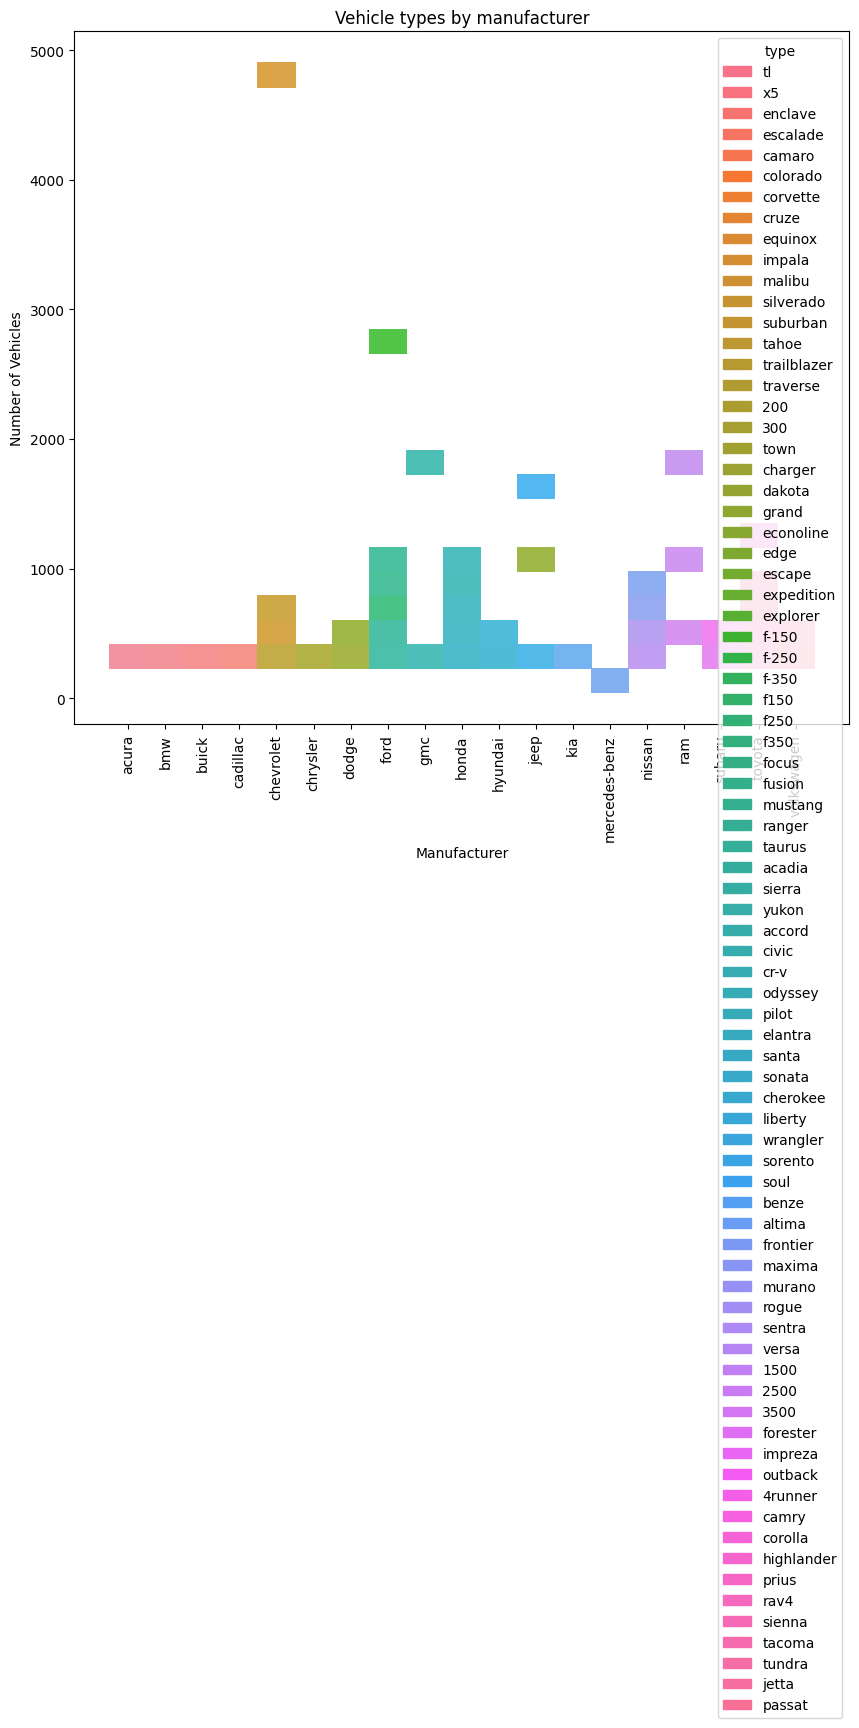

In [30]:
plt.figure(figsize=(10, 9))
sns.histplot(data=manufacturer_type_counts, x='manufacturer', y='count',hue='type')
plt.title('Vehicle types by manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()

The histogram above shows the significant variation in the model type across different manufacturers. Manufacturers such as Ford and Chevrolet are more skewed toward truck and SUV production. Chevrolet common model types are equinox, tahoe, and transverse. Thoses manufacturers are more into customers seeking utility vehicles. While manufacturers such as hyundai, honda, and toyota have a broader distribution offering camry, elantra, sonata like compact cars. Those manufacturers are more into customers needs. 

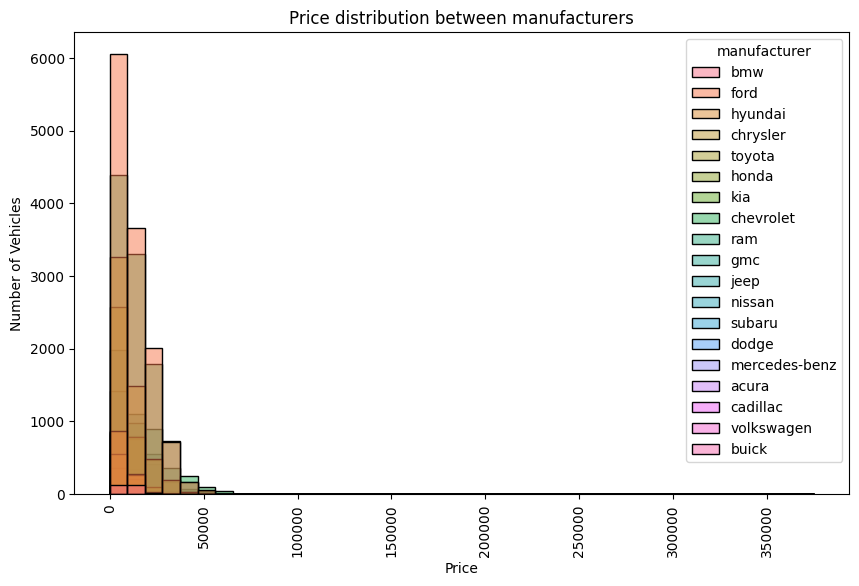

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicles_us, x='price', hue='manufacturer', bins=40)
plt.title('Price distribution between manufacturers')
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()

The histogram above shows the price distibution among various car manufacturers. Manufacturers like ford, hyundai, honda, chevrolet, and toyota tend to have larger number of cars in lower price range. While manufacturers like mercedes-benz, and bmw tend to have their cars in higher price range. Among all manufacturers such as ford, hyundai, and toyota tend to have larger number of cars compare to other manufacturers. 

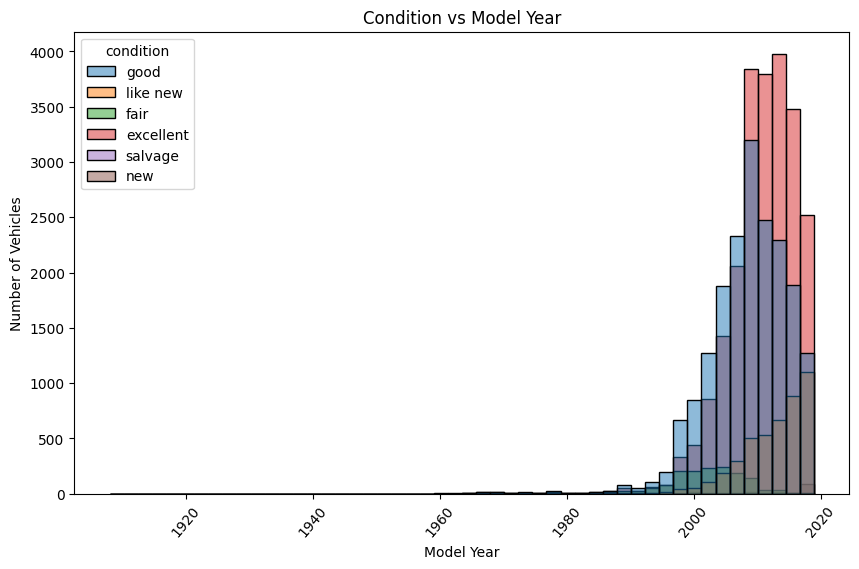

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicles_us, x='model_year', hue='condition', bins=50)
plt.title('Condition vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=50)
plt.show()

The histogram above shows the condition of the cars based on its model year. Here the trend shows that the cars in 'new', or 'excellent' conditions are mostly from recent model years. In this graph, one can see that those cars are from 2010 to 2020 model years. Along with it, there is a drop-off in the number of cars in top condition as the model year decreases that are years after 2010 which reflects to the wear and tear over time. As expected it can be seen that the number of cars which does not have recent years doesn't have that good condition. Because of this, the number of cars decreases as expected. 

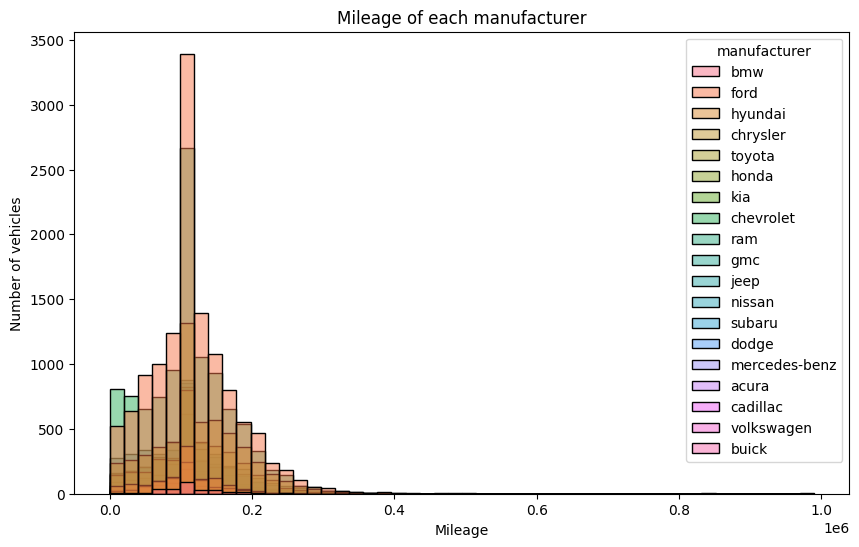

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicles_us, x='odometer', hue='manufacturer', bins=50)
plt.title('Mileage of each manufacturer')
plt.xlabel('Mileage')
plt.ylabel('Number of vehicles')
plt.show()

The histogram above shows the odometer reading (mileage) of the car based on the manufacturer of the car. From the graph, it can be seen that manufacturers such as ford and chevrolet, have vehicles with a broad range of mileage including high mileage cars which suggests that these vehicles would be durable and are used for longer periods. Along with this,  manufacturers such as hyundai, toyota, and honda have vehicles with high mileage and so the number of vehicles are more. While manufacturers such as BMW vehicles are mostly with lower mileage signifying newer models or be luxury cars which have less frequent usage. 

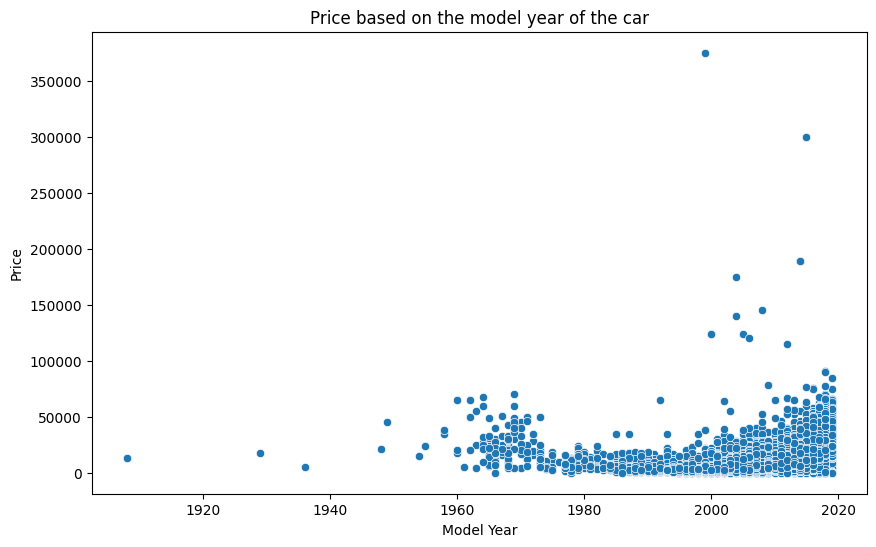

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_us, x='model_year', y='price')
plt.title('Price based on the model year of the car')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

The scatterplot above shows a positive relationship between the model year of a car and its price. As it can be seen, newer cars have higher prices as expected. Conversly, older cars tend to priced lower which is as expected based on the factors such as classic or rare models that retain its value despite their age. Along with this, newer model year cars prices may vary significantly based on the factors such as brands, model, or any additional special features.

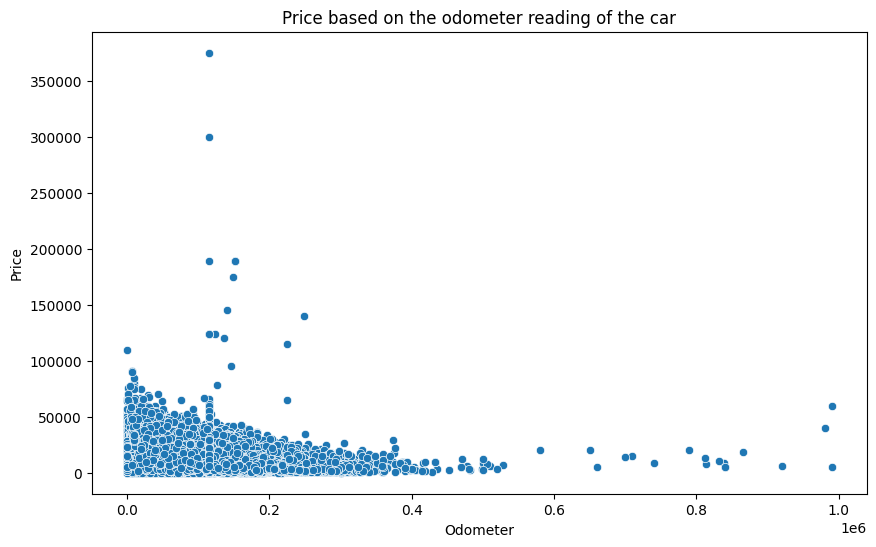

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_us, x='odometer', y='price')
plt.title('Price based on the odometer reading of the car')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

The scatterplot above demonstrates a inverse relationship between a car's odometer and the price of a car. In the graph above the cars with higher mileage have lower price which makes sense as it demonstrates the deprication of the car value due to increased wear and tear. However, there are few vehicles that have traveled long distances and still have relastively high prices which might have due to certain luxury models or well maintained vehicles. Most of the expensive cars have very less mileage which makes sense as those cars will be the brand new cars. Conversly, there are the cars with low odometer reading and are priced lower which can be due to fasctors such as car model, and mechanical issues.

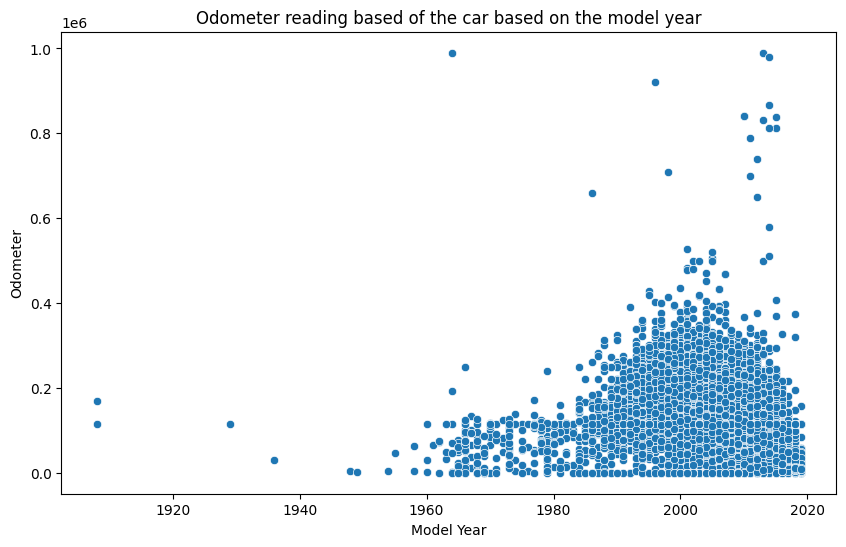

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_us, x='model_year', y='odometer')
plt.title('Odometer reading based of the car based on the model year')
plt.xlabel('Model Year')
plt.ylabel('Odometer')
plt.show()

The scatterplot shown above shows the odometer reading (Mileage) of the car based on the model year. Newer cars (brand new cars)tend to have lower odometer readings, which makes sense as they haven't been on the road. Along with this there are some newer cars (outliers) which have unusally high odometer readings which suggests that these cars are driven extensively in a short period of time. Cars which are 20 to 50 years old tend to show higher odometer readings, indicating that they have been driven more over time. Along with that, cars which are more than 50 - 60 years old have very low odometer readings indicating that they are not much driven or have been well-preserved.

In this project using the car sales advertisements data a interactive web application was developed using Streamlit and deployed to a cloud service to make it accessible to the public using Render platform. From the Statistical Data Analysis it was known that manufacturers such as ford and chevrolet are more skewed towards truck and SUV production which signifies that the vehicles by those manufactures are more durable. high mileage and are customers seeking utility vehicles. Along with this, manufacturers such as hyundai, honda, and toyota are have a broader distribution offering camry, elantra, sonata like compact cars which signifies that those manufacturers are more into diverse customers needs. So those manufacturers tend to have larger number of cars in lower price range. Cars with recent model years tend to be in 'new' or 'excellent' condition. While there is a drop-off in the number of cars in top condition as the model year are not recent which refects to the wear and tear of the cars over time and so those cars are cars from older model years decreases. Along with this, a positive relationship was seen between the model year of a car and its price. As expected the newer cars have higher prices and older cars have lower prices. A inverse relationship between a car's odometer reading and the price of a car. As the cars with higher mileage tend to have lower prices which demonstrates the depriciation of cars over time. While the cars with lower mileage tend to have higher prices as those cars are most likely the newer or luxury cars. 